# 1. Data wrangling

Data wrangling is the process of collecting, inspecting and cleaning the data for further exploration and modelling. It entails the following steps: 

1. Data collection 
2. Analysis and profiling
3. Quality check assesment
4. Data cleaning

The present notebook contains the steps one and two above.

The first step is importing the necessary packages

In [1]:
# Import the required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

---
### 1.1. Data collection

This step involves gathering data from different sources and put together a single structure, usually a dataframe. In this case, the original dataset was already prepared by The US Energy Information Administration (EIA), and includes a meta-data file describing the variables' content. 

In [2]:
# Import original dataset and load it into a dataframe

file = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone-2/data/raw/recs2015_public_v4.csv'

df = pd.read_csv(file, index_col=None)

In [3]:
df.shape

(5686, 759)

The origin of the EIA dataset was a survey conducted in 2015 from a representative sample of the total US residential units. It comprises 5686 observations and 759 different attributes, which could be classified in higher level groups:

- Building attributes
- Building system features
- Household uses and habits
- Social and demographic characteristics
- Energy consumption features 
- Economic features
- Climate data

Not all features are relevant for this project. I will select and extract the response and explanatory variables that could be later fetched from the listing website. Finally, I will load the resulting dataset into a DataFrame object. 

Here is an excerpt from the meta-data file with the selected explanatory variables and their meaning: 

| Explanatory Variable Name | Variable Description |
| -------- | --------- |
| ATTIC | Attic above the housing unit |
| BEDROOMS | Number of bedrooms |
| CELLAR | Housing unit over a basement |
| COOLTYPE | Type of air conditioning equipment used |
| EQUIPAGE | Age of main space heating equipment |
| EQUIPM | Main space heating equipment type |
| HIGHCEIL | High ceilings |
| CLIMATE_REGION_PUB | "Building America" Climate Zone |
| KOWNRENT | Own or rent |
| NCOMBATH | Number of full bathrooms |
| NHAFBATH | Number of half bathrooms |
| PROTHERM | Programmable main thermostat |
| SIZEOFGARAGE | Size of attached garage |
| STORIES | Number of stories in a single-family home |
| TOTSQFT_EN | Total square footage (used for publication) |
| TYPEHUQ | Type of housing unit |
| YEARMADERANGE | Range when housing unit was built |

And here is another excerpt with the selected target variables:

| Target Variable Name | Variable Description |
| -------- | --------- |
| DOLELCOL | Electricity cost for air conditioning (central systems and individual units), in dollars, 2015 |
| TOTALDOLSPH | Total cost for space heating, main and secondary, in dollars, 2015 |
| TOTALDOLWTH | Total cost for water heating, main and secondary, in dollars, 2015 | 
| DOLLAREL | Total electricity cost, in dollars, 2015 |

In [4]:
# Select and store relevant variables for the project in a list

main_feat = [
            'TYPEHUQ',
            'CLIMATE_REGION_PUB',
            'YEARMADERANGE',
            'TOTSQFT_EN',
            'COOLTYPE',
            'EQUIPAGE',
            'EQUIPM',
            'HIGHCEIL',
            'ATTIC',
            'CELLAR',
            'BEDROOMS',
            'NCOMBATH',
            'NHAFBATH',
            'PROTHERM',
            'SIZEOFGARAGE',
            'STORIES',
            'KOWNRENT',
            'DOLELCOL',
            'DOLLAREL',
            'TOTALDOLSPH', 
            'TOTALDOLWTH'  
            ]

In [5]:
# Select the working dataframe based on selected variables for the project

df = df[main_feat]

In [6]:
# Check for number of rows and columns

df.shape

(5686, 21)

In [7]:
# Print sample

df.head()

,TYPEHUQ,CLIMATE_REGION_PUB,YEARMADERANGE,TOTSQFT_EN,COOLTYPE,EQUIPAGE,EQUIPM,HIGHCEIL,ATTIC,CELLAR,...,NCOMBATH,NHAFBATH,PROTHERM,SIZEOFGARAGE,STORIES,KOWNRENT,DOLELCOL,DOLLAREL,TOTALDOLSPH,TOTALDOLWTH
0,2,Hot-Dry/Mixed-Dry,7,1808,1,41,3,1,0,0,...,2,1,1,2,20,1,365.46,967.23,176.59,248.33
1,2,Hot-Humid,5,759,2,1,9,0,0,0,...,1,0,1,-2,10,1,249.54,1366.00,380.52,234.49
2,2,Mixed-Humid,4,2288,3,42,3,0,0,1,...,2,0,1,-2,10,1,844.63,2428.08,601.17,250.71
3,2,Mixed-Humid,2,2573,1,3,3,1,0,1,...,2,0,0,2,10,1,471.13,1313.12,863.46,114.62
4,2,Cold/Very Cold,4,1024,1,3,3,0,1,1,...,2,0,0,1,20,1,62.05,581.07,67.87,220.26


---
### 1.2. Analysis and profiling

In this section, datatypes and statistics of different variables will be explored. Further, a general individual visualization of variables will be plotted to present a overview of their distribution. 

**Data types inspection**

In [8]:
# Inspect datatypes and missing data entries

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TYPEHUQ             5686 non-null   int64  
 1   CLIMATE_REGION_PUB  5686 non-null   object 
 2   YEARMADERANGE       5686 non-null   int64  
 3   TOTSQFT_EN          5686 non-null   int64  
 4   COOLTYPE            5686 non-null   int64  
 5   EQUIPAGE            5686 non-null   int64  
 6   EQUIPM              5686 non-null   int64  
 7   HIGHCEIL            5686 non-null   int64  
 8   ATTIC               5686 non-null   int64  
 9   CELLAR              5686 non-null   int64  
 10  BEDROOMS            5686 non-null   int64  
 11  NCOMBATH            5686 non-null   int64  
 12  NHAFBATH            5686 non-null   int64  
 13  PROTHERM            5686 non-null   int64  
 14  SIZEOFGARAGE        5686 non-null   int64  
 15  STORIES             5686 non-null   int64  
 16  KOWNRE

According to the meta-data file, some of the variables shown as numerical above are actually categorical. An update of the data types is necessary. 

In [9]:
# Store updated datatype information in a dictionary

dtypes_dict = { 
                'ATTIC':'category',
                'BEDROOMS':'int64',
                'CELLAR':'category',
                'COOLTYPE':'category',
                'DOLELCOL':'float64',
                'DOLLAREL':'float64',
                'EQUIPAGE':'category',
                'EQUIPM':'category',
                'HIGHCEIL':'category',
                'CLIMATE_REGION_PUB':'category',
                'KOWNRENT':'category',
                'NCOMBATH':'int64',
                'NHAFBATH':'int64',
                'PROTHERM':'category',
                'SIZEOFGARAGE':'category',
                'STORIES':'category',
                'TOTALDOLSPH':'float64',
                'TOTSQFT_EN':'float64',
                'TYPEHUQ':'category',
                'YEARMADERANGE':'category',
                'TOTALDOLWTH':'float64'
              }

df = df.astype(dtypes_dict) # Apply correct variables' datatypes

---
**Variable optimization**

Many of categorical variables has intergers code entries corresponding to classification groups explained in the meta-data information. The codes will be replaced in the cell below by the actual meaning to improve readability in graphs and plots.

Also, some categorical variables will be grouped in broader classification to reduce the number of variables.

In [10]:
# Change category names in category variables for better readability

equipage = {1:'A: -2 yrs', 2:'B: 2-4 yrs', 3:'C: 5-9 yrs', 41:'D: 10-14 yrs', 42:'E: 15-19 yrs', 5:'F: +20 yrs', -2:'None'}
df['EQUIPAGE'].replace(equipage, inplace=True)

kownrent = {1:'Owned', 2:'Rented', 3:'Occupied'}
df['KOWNRENT'].replace(kownrent, inplace=True)

stories = {10:'1', 20:'2', 31:'3', 32:'+4', 40:'Split-level', -2:'NA'} 
df['STORIES'].replace(stories, inplace=True)

typehuq = {1:'Mobile home', 2:'Detached house', 3:'Attached house', 4:'Apartment in bld \nwith 2-4 units', 5:'Apartment in bld \nwith 5+ units'}
df['TYPEHUQ'].replace(typehuq, inplace=True)

yearmaderange = {1:'.<1950', 2:'1950-1959', 3:'1960-1969', 4:'1970-1979', 5:'1980-1989', 6:'1990-1999', 7:'2000-2009', 8:'2010-2015'}
df['YEARMADERANGE'].replace(yearmaderange, inplace=True)

In [11]:
# Reclassify categories in broader groups 

cooltype = {1:'Central', 2:'Individual', 3:'Both central \nand individual', -2:'None'}
df['COOLTYPE'].replace(cooltype, inplace=True)

equipm = {2:'Central water system', 3:'Central furnace', 4:'Central heat pump', 5:'Other individual', 6:'Other individual', 7:'Other individual', 8:'Other individual', 9:'Other individual', 10:'Other individual', 21:'Other individual', -2:'None'}
df['EQUIPM'].replace(equipm, inplace=True)

# Merge number of bathrooms and half-bathrooms in a single category
df['BATHROOMS'] = df['NCOMBATH'] + df['NHAFBATH']/2
df.drop(['NCOMBATH', 'NHAFBATH'], axis=1, inplace=True)

# Group number of bathrooms in larger categories
df['BATHROOMS'] = pd.cut(df['BATHROOMS'], bins=[0,1,2,3.5,np.inf], labels=['0-1', '1.5-2','2.5-3.5', '+3.5'])

# Group number of bedrooms in larger categories
df['BEDROOMS'] = pd.cut(df['BEDROOMS'], bins=[0,2,3,4,np.inf], labels=['0-2', '3', '4', '+4'])

# Add a new variable for Total electric consumption excluding cooling, and drop the former
df['ELECT_COST'] = df['DOLLAREL'] - df['DOLELCOL']
df.drop(['DOLLAREL'], axis=1, inplace=True)

In [12]:
# Add new category adding total consumption cost

df['TOT_COST'] = df[['DOLELCOL', 'TOTALDOLSPH', 'TOTALDOLWTH', 'ELECT_COST']].sum(axis=1)

---
**Variable renaming**

Columns are renamed to represent their meaning more intuitively and improve code readability

In [13]:
# Creates a dict with actual and new names.

rename = {'ATTIC':'ATTIC',
          'BEDROOMS':'BEDROOMS',
          'CELLAR':'BASEMENT',
          'COOLTYPE':'COOL_TYPE',
          'DOLELCOL':'COOL_COST',
          'EQUIPAGE':'EQUIP_AGE',
          'EQUIPM':'HEAT_TYPE',
          'HIGHCEIL':'HIGH_CEIL',
          'CLIMATE_REGION_PUB':'CLIMATE_REGION',
          'KOWNRENT':'OWNERSHIP',
          'NCOMBATH':'NCOMBATH',
          'NHAFBATH':'NHAFBATH',
          'PROTHERM':'THERMOSTAT',
          'SIZEOFGARAGE':'SIZEOFGARAGE',
          'STORIES':'STORIES',
          'TOTALDOLSPH':'HEAT_COST',
          'TOTSQFT_EN':'FLOOR_AREA',
          'TYPEHUQ':'UNIT_TYPE',
          'YEARMADERANGE':'DECADE_BUILT',
          'TOTALDOLWTH':'WATERHEAT_COST'
            }

In [14]:
# Rename columns applying 'rename' dict

df.rename(rename, axis=1, inplace=True)

---
**Visual inspection of variable distributions**

Categorical variables are plotted below individually for further inspection. 

In [15]:
# Create a function to generate a PMF plot for categorical and discrete variables

def Pmf(series, Title):
    '''Generates a probability mass function (PMF) of a pandas series'''
    value = series.value_counts().sort_index()
    pmf = value*100 / len(series)
    plt.bar(value.index, pmf)
    plt.xticks(value.index, fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylabel('Frequency', fontsize=13)
    plt.title(Title, fontsize=15, fontweight='bold')

In [16]:
# Set visual style for graphs

plt.style.use('seaborn')

Broad classification for residential units are shown below. Type, age and location (climate clasiffication) of the units are perhaps the most determinant factors in the variance of the target variable.

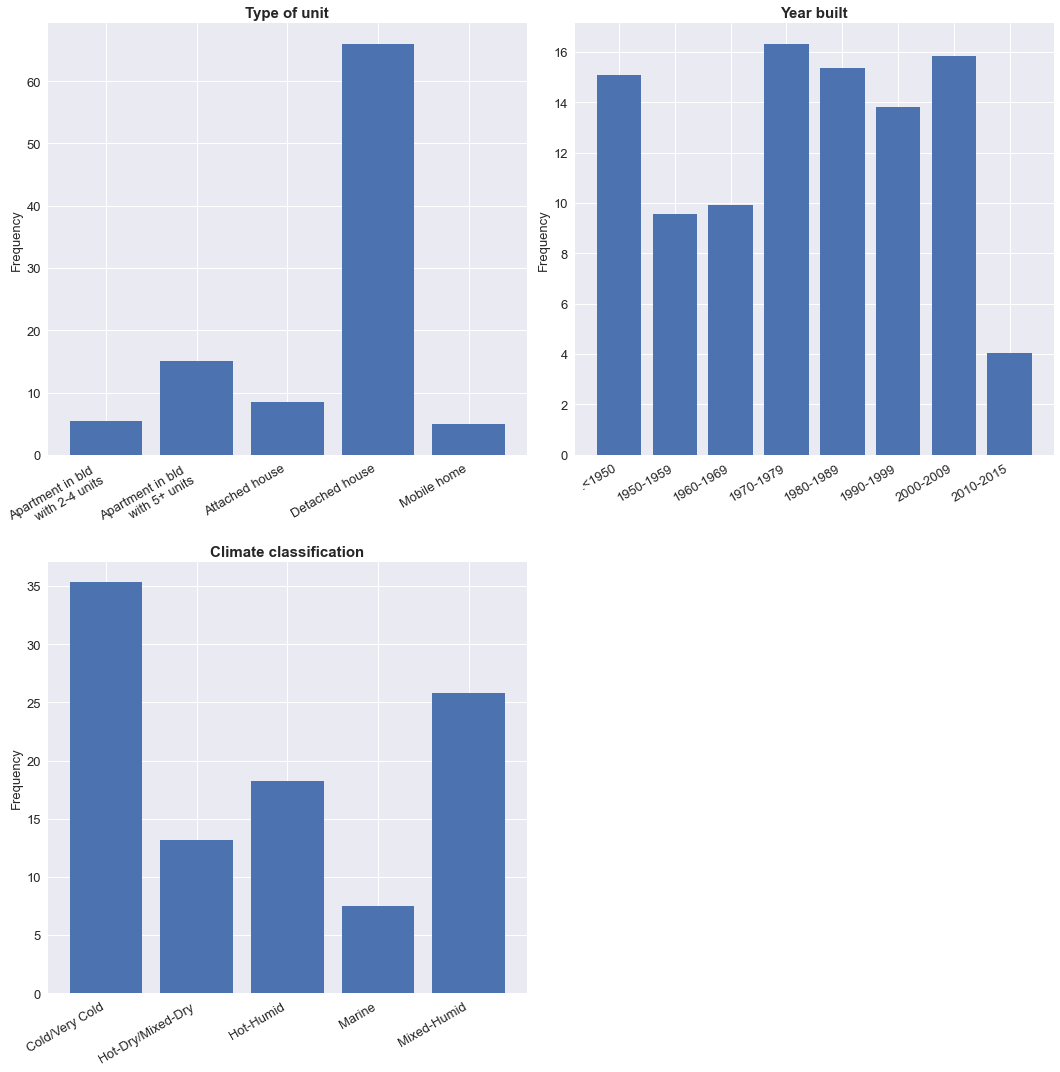

In [17]:
fig = plt.figure(figsize=(15,15), dpi=72)

# Plot type of housing unit
plt.subplot(2,2,1)
Pmf(df['UNIT_TYPE'], 'Type of unit')
plt.xticks(rotation=30, horizontalalignment='right')

# Plot year built
plt.subplot(2,2,2)
Pmf(df['DECADE_BUILT'], 'Year built')
plt.xticks(rotation=30, horizontalalignment='right')

# Plot climate classification
plt.subplot(2,2,3)
Pmf(df['CLIMATE_REGION'], 'Climate classification')
plt.xticks(rotation=30, horizontalalignment='right')

plt.tight_layout()
plt.show()

There are a few relevant characteristics that can be observed:
- Most of units are deattached houses (+65%)
- Age values are uniformly distributed except for decades 1950-1959 and 1960-1969 which present roughly half of entries that other decades
- Climate distribution for units' location seems consistent with climate areas proportion in the US mainland territory, dominated by climates Cold/Very Cold and Mixed-Humid.

Floor area represents other important explanatory factor for units' energy consumption, its distribution and summary statistics are shown in two cells below:

In [18]:
# Check summary statistics for Floor Area variable

df['FLOOR_AREA'].describe()

count    5686.000000
mean     2081.443546
std      1282.660286
min       221.000000
25%      1100.500000
50%      1773.500000
75%      2766.000000
max      8501.000000
Name: FLOOR_AREA, dtype: float64

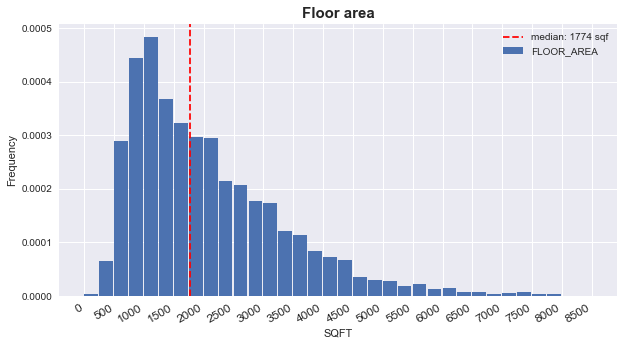

In [19]:
# Plot histogram for floor area measurements

sqf = df['FLOOR_AREA']

# Creates figure and plot 
fig = plt.figure(figsize=(10,5), dpi=72)
sqf.plot.hist(bins=34, range=[0,8500], density=True, width=230)
sqf_median = round(np.median(sqf))
plt.axvline(sqf_median, color='Red', linestyle='--', label='median: '+str(sqf_median)+' sqf')
plt.legend()


# Adjust graphic appearance
x_list = [i*500 for i in range(0,18)]
plt.xticks(x_list, x_list, rotation=30, horizontalalignment='right', fontsize=12)
plt.xlabel('SQFT')
plt.title('Floor area', fontweight='bold', fontsize=15)

plt.show()

- Floor areas have a skewed distribution resembling a Poisson-like shape. 
- Median floor area is 2081 sqft.

PMF plots for different __building system__ features are shown in the cell below:

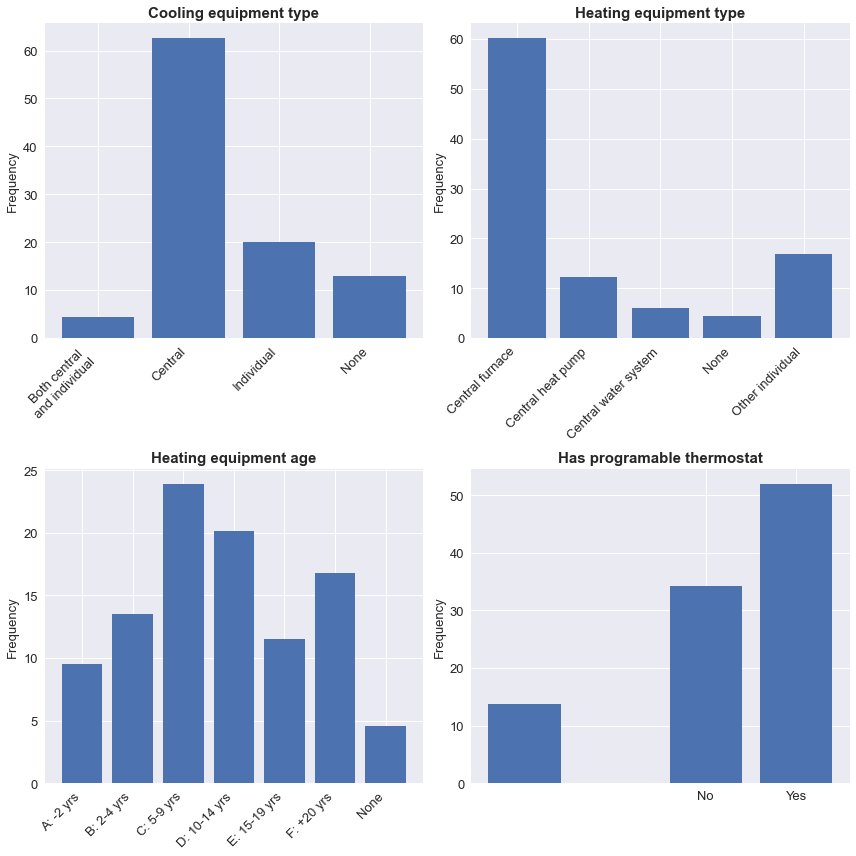

In [20]:
# Plot PMF of categorical variables

fig = plt.figure(figsize=(12,12), dpi=72)

plt.subplot(2,2,1)
Pmf(df['COOL_TYPE'], 'Cooling equipment type')
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(2,2,2)
Pmf(df['HEAT_TYPE'], 'Heating equipment type')
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(2,2,3)
Pmf(df['EQUIP_AGE'], 'Heating equipment age')
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(2,2,4)
Pmf(df['THERMOSTAT'], 'Has programable thermostat')
plt.xticks([0,1], labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

It can be observed that:
- An overwhelming mayority of units use central conditioning systems alone or in combination with other type
- Roughly half of units have a programable thermostat
- Heating equipments age are roughly evenly distributed with a peak between 5-10 years. Median age is around 10 years.
- Roughly 17% of heating equiments were installed more than 20 years ago

In the next four cells, it can be seen the distribution of other variables accounting for **unit's general features**

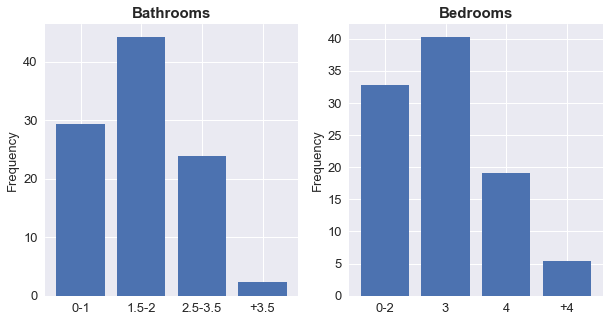

In [21]:
# Plot PMF

fig = plt.figure(figsize=(10,5), dpi=72)

plt.subplot(1,2,1)
Pmf(df['BATHROOMS'], 'Bathrooms')

plt.subplot(1,2,2)
Pmf(df['BEDROOMS'], 'Bedrooms')

plt.show()

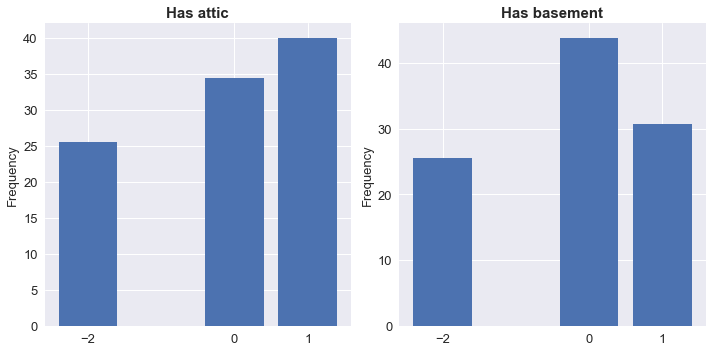

In [22]:
# Plot PMF of categorical variables

fig = plt.figure(figsize=(10,5), dpi=72)

plt.subplot(1,2,1)
Pmf(df['ATTIC'], 'Has attic')

plt.subplot(1,2,2)
Pmf(df['BASEMENT'], 'Has basement')

plt.tight_layout()
plt.show()

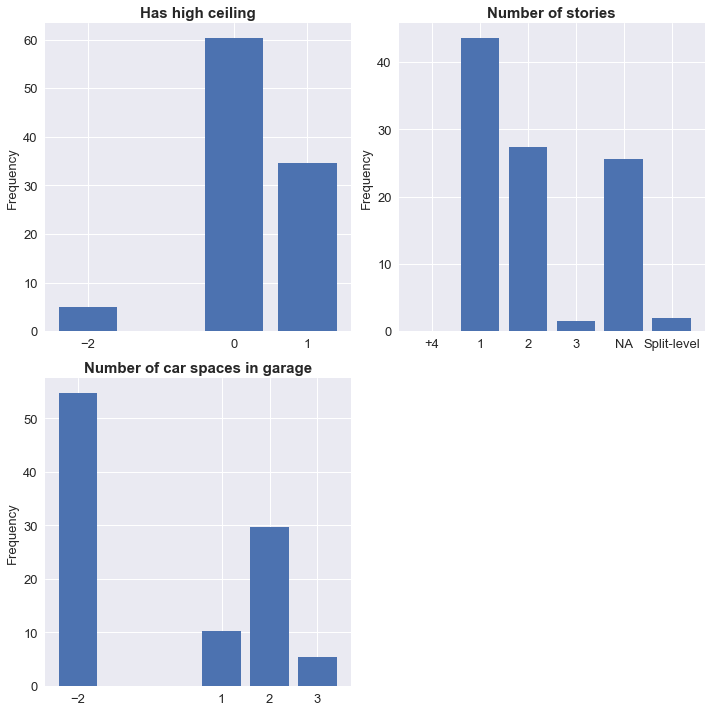

In [23]:
# Plot PMF of categorical and numerical variables

fig = plt.figure(figsize=(10,10), dpi=72)

plt.subplot(2,2,1)
Pmf(df['HIGH_CEIL'], 'Has high ceiling')

plt.subplot(2,2,2)
Pmf(df['STORIES'], 'Number of stories')

plt.subplot(2,2,3)
Pmf(df['SIZEOFGARAGE'], 'Number of car spaces in garage')

plt.tight_layout()
plt.show()

**Social and demographic** related variables are depicted in the cell below

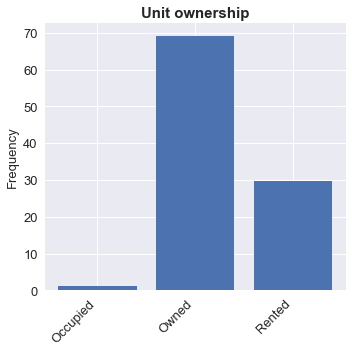

In [24]:
# Plot PMF of categorical variables

fig = plt.figure(figsize=(5,5), dpi=72)

Pmf(df['OWNERSHIP'], 'Unit ownership')
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

We can see that roughly 70% of housholds own the house in which they live.

**Target variables**

They all represent dollar costs for different energy uses in the units.

Statistics of target variables are presented below:

In [25]:
# Check summary statistics for target variables

df.describe().T[1:]

,count,mean,std,min,25%,50%,75%,max
COOL_COST,5686.0,237.380515,277.863400,0.00,48.3650,146.605,328.2625,2860.01
HEAT_COST,5686.0,511.110366,482.333423,0.00,164.0200,400.845,695.2075,4766.66
WATERHEAT_COST,5686.0,296.659831,208.840347,0.00,156.6775,236.445,375.4900,2566.61
ELECT_COST,5686.0,1166.398547,703.334011,15.43,670.0450,1021.745,1496.9200,7310.58
TOT_COST,5686.0,2211.549260,1208.505501,76.40,1348.6500,1997.590,2826.4875,11078.48


Since the distribution is not symmetric the median is the statistic that best represents the whole distribution. We can see that:

- The median annual cooling consumption cost is 328 USD
- The median annual heating consumption cost is 400 USD
- The median annual water heating consumption cost is 236 USD
- The median annual electricity consumption cost is 1021 USD
- The median annual total energy consumption cost is 1998 USD

A particular characteristic of these distribution is the large spread of the values. Some households have as much as $11,000 of annual energy consumption cost overall.

Furthermore, histograms of the target variables are depicted below:

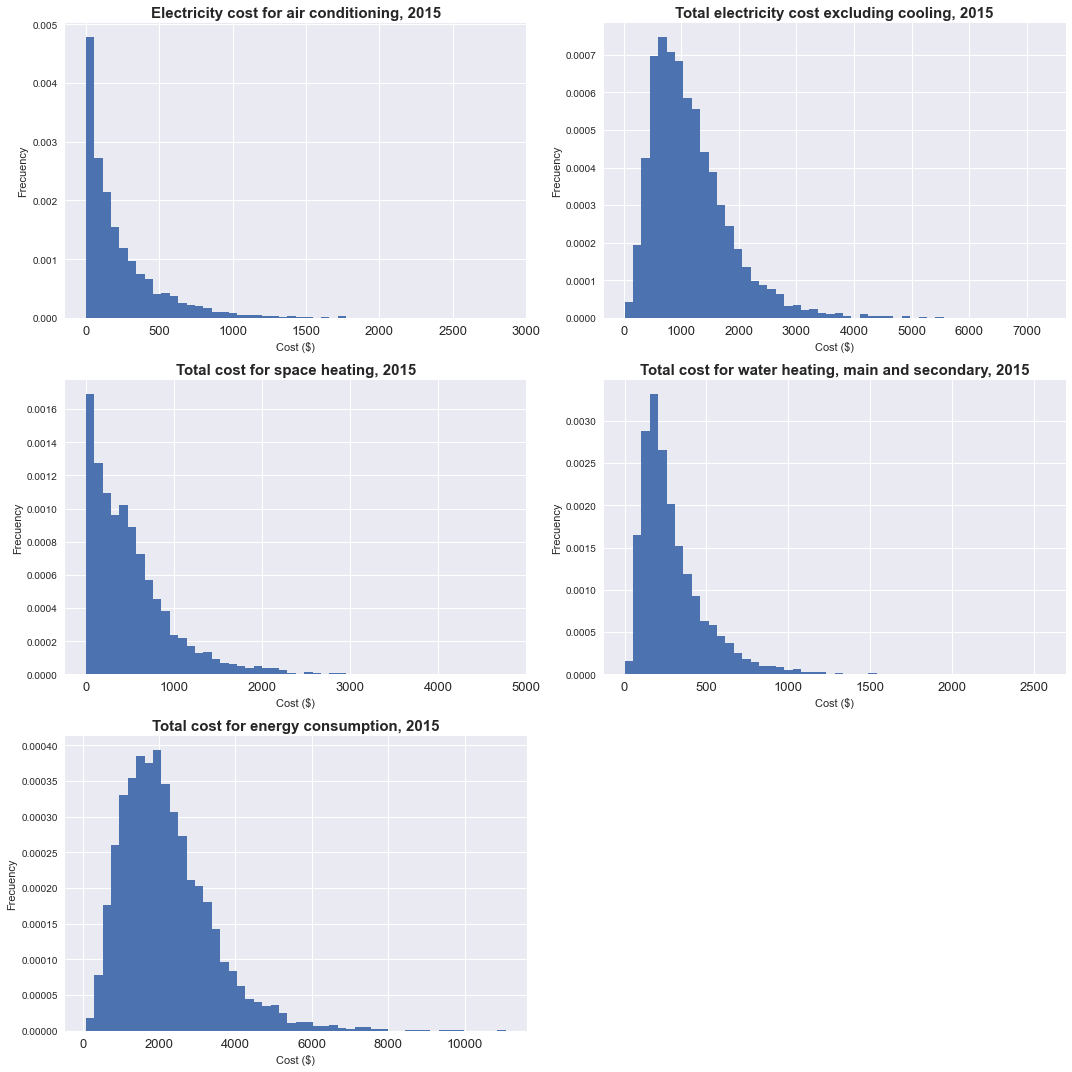

In [26]:
# Plot histograms of utility dollar spending

fig = plt.figure(figsize=(15,15), dpi=72)

plt.subplot(3,2,1)
plt.hist(df['COOL_COST'], bins=50, density=True)
plt.title('Electricity cost for air conditioning, 2015', weight='bold').set_fontsize('15')
plt.xticks(fontsize=13)
plt.xlabel('Cost ($)')
plt.ylabel('Frecuency')

plt.subplot(3,2,2)
plt.hist(df['ELECT_COST'], bins=50, density=True)
plt.title('Total electricity cost excluding cooling, 2015', weight='bold').set_fontsize('15')
plt.xticks(fontsize=13)
plt.xlabel('Cost ($)')
plt.ylabel('Frecuency')

plt.subplot(3,2,3)
plt.hist(df['HEAT_COST'], bins=50, density=True)
plt.title('Total cost for space heating, 2015', weight='bold').set_fontsize('15')
plt.xticks(fontsize=13)
plt.xlabel('Cost ($)')
plt.ylabel('Frecuency')

plt.subplot(3,2,4)
plt.hist(df['WATERHEAT_COST'], bins=50, density=True)
plt.title('Total cost for water heating, main and secondary, 2015', weight='bold').set_fontsize('15')
plt.xticks(fontsize=13)
plt.xlabel('Cost ($)')
plt.ylabel('Frecuency')

plt.subplot(3,2,5)
plt.hist(df['TOT_COST'], bins=50, density=True)
plt.title('Total cost for energy consumption, 2015', weight='bold').set_fontsize('15')
plt.xticks(fontsize=13)
plt.xlabel('Cost ($)')
plt.ylabel('Frecuency')

plt.tight_layout()
plt.show()

All target variables' ditributions are left skewed with long tails to the right. They resemble to poisson or exponential shape distributions, whose one of the most significant features is the presence of several outliers.

As seen above, many variables have "-2" values meaning "non-applicable", which are replaced below for np.NaN values for better inspection and handling in the next notebook

In [27]:
# Replace -2 (non applicable) values in numeric variables

df.replace(-2, np.nan, inplace=True)

The resulting dataframe is loaded in a csv file for further missigness analysis and data transformation in a different notebook. 

In [28]:
# Writing df dataframe to csv

path = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone-2/data/interim/pre-selected.csv'

df.to_csv(path)